# Advanced Presentation - SQLite

##### Group 3: Yuke Wu, Chang Liu
##### 2020-09-28

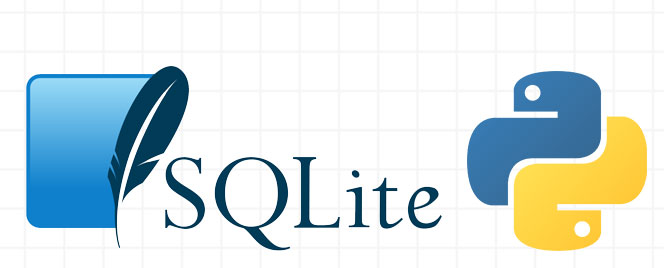

### What is SQLite?

#### (1)SQLite is an embedded database software for local/client storage in application software such as web browsers. 
#### (2)It’s a widely deployed database engine 
#### (3)It is built into Python but is only built for access by a single connection at a time

In [96]:
# sqlite3 came with my anaconda distribution so I did not need to install anything special.
import sqlite3 as lite

In [87]:
# create the database named company.db
conn = lite.connect('company.db')
# just like the standard SQL, I create the table named employee, and set the id as PK
with conn:
    conn.execute('''
    CREATE TABLE employee (
    name TEXT,
    age INTEGER,
    department TEXT,
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT);
    ''')

In [88]:
# insert the data into employee table
sql = 'insert into employee (id, name, age, department) values(?, ?, ?, ?)'
# in the data, we have 5 employees in this company, and they are in the 3 different departments
datas = [
    (1, 'John', 20, 'Sales'),
    (2, 'Dan', 18, 'Sales'),
    (3, 'James', 25, 'IT'),
    (4, 'Amy', 27, 'IT'),
    (5, 'Ron', 24, 'HR')
]
with conn:
    conn.executemany(sql, datas)

In [89]:
# Let's check how the table look like?
# using the select * from employee to extract all of the data of the employee table
with conn:
    datas = conn.execute("select * from employee")
    for data in datas:
        print(data)

('John', 20, 'Sales', 1)
('Dan', 18, 'Sales', 2)
('James', 25, 'IT', 3)
('Amy', 27, 'IT', 4)
('Ron', 24, 'HR', 5)


In [90]:
# I want to show the employees' names and their departments which their departments are 'sales' and 'IT'
# method 1
with conn:
    datas = conn.execute("select name,department from employee where department in ('Sales','IT')")
    for data in datas:
        print(data)

('John', 'Sales')
('Dan', 'Sales')
('James', 'IT')
('Amy', 'IT')


In [91]:
# method 2
# Sets the row_factory to the callable sqlite3.Row, which converts the plain tuple into a more useful object.
conn.row_factory = lite.Row
with conn:
    datas = conn.execute("select * from employee where department in ('Sales','IT')")
    for data in datas:
        print(data['name'],data['department'])

John Sales
Dan Sales
James IT
Amy IT


In [92]:
# Now, let's see how to join with different tables
# Like previous one, I create another table named info
with conn:
    conn.execute('''
    CREATE TABLE info (
    e_id INTEGER,
    salary integer,
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT);
    ''')
# and insert the data into this table
# I have set salaries for those five employees
    sql = 'insert into info (e_id, salary) values(?, ?)'
    datas = [
    (1, 70000),
    (2, 60000),
    (3, 55000),
    (4, 75000),
    (5, 50000)
    ]
    conn.executemany(sql, datas)

In [94]:
# Now I want to show the employees' names and their corresponding salaries
# The reason why I want to use the INNER JOIN keyword is it can select records that have matching values in both tables
with conn:
    sql = 'select e.name as name, i.salary as salary from employee e inner join info i on e.id=i.e_id'
    datas = conn.execute(sql)
    for data in datas:
        print(f'the salary of {data["name"]}：{data["salary"]}')

the salary of John：70000
the salary of Dan：60000
the salary of James：55000
the salary of Amy：75000
the salary of Ron：50000


In [73]:
# You can delete the data from the table which you don't want
# don't forget to use WHERE clause!
with conn:
    conn.execute("delete from employee where department = 'HR'")

In [85]:
# When you don’t want those tables, you can drop the table, using the drop table function.
conn.execute('DROP TABLE employee')

In [86]:
# Drop the table!
conn.execute('DROP TABLE info')

# Scenarios that SQLite works well!

## Embedded devices and the internet of things
### Because an SQLite database requires no administration, it works well in devices that must operate without expert human support. Client/server database engines are designed to live inside a lovingly-attended datacenter at the core of the network. SQLite works there too

## Website
### SQLite works great as the database engine for most low to medium traffic websites (which is to say, most websites). The amount of web traffic that SQLite can handle depends on how heavily the website uses its database. Generally speaking, any site that gets fewer than 100K hits/day should work fine with SQLite. 

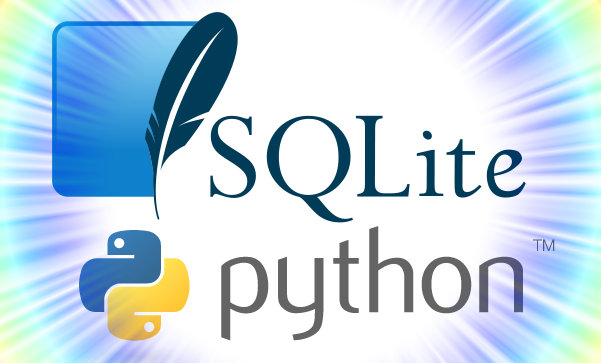

### Additional Resources:

https://docs.python.org/3/library/sqlite3.html

https://en.wikipedia.org/wiki/SQLite